# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

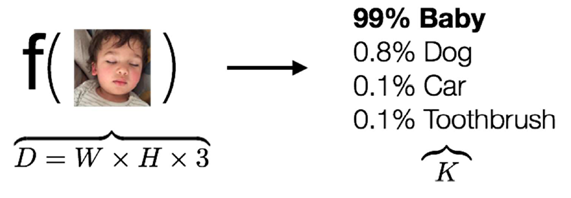


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

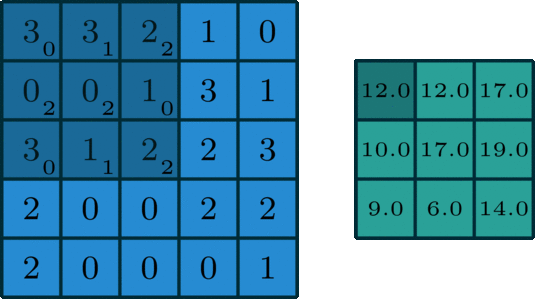

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


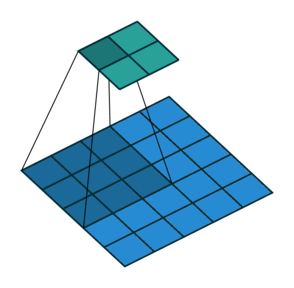



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną.

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

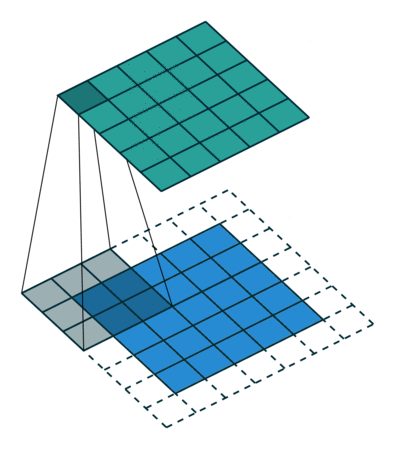

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu.
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

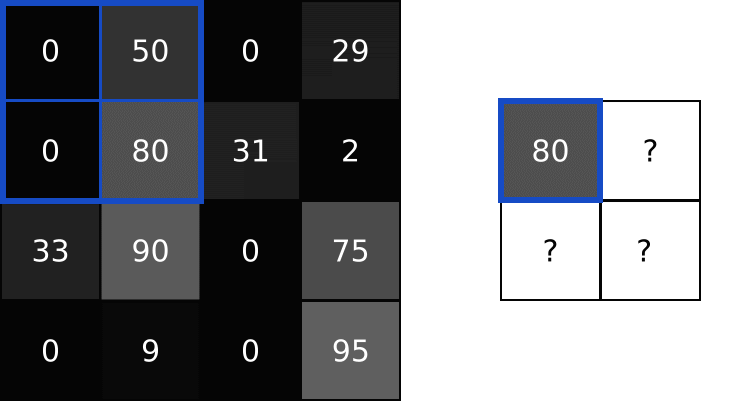

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*,
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia.
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [21]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami.

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [22]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

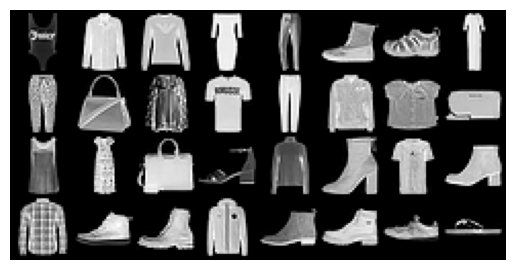

top        Coat       Pullover   Dress      Trouser    Ankle boot Sandal     Dress     
Trouser    Bag        Shirt      top        Trouser    Coat       Shirt      Bag       
top        Dress      Bag        Sandal     Shirt      Ankle boot top        Ankle boot
Shirt      Sneaker    Ankle boot Coat       Ankle boot Ankle boot Sneaker    Sandal    


In [23]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

### Zadanie 1 (2 punkty)


Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [31]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    output_neurons = 10
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=20,out_channels=50, kernel_size=5)
        # 800 = 25 x 4 x 4
        self.fc1 = nn.Linear(in_features = 800, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=100)
        self.fc3 = nn.Linear(in_features=100, out_features = self.output_neurons)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# your_code

In [ ]:
lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())
print(param_num)
assert param_num == 296980
print("Solution is correct!")

296980
Solution is correct!


Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [ ]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Zadanie 2 (1 punkt)

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [ ]:
net.train()

for epoch in range(5):
  for X_batch, y_batch in trainloader:
        X_batch = X_batch.to("cuda")
        y_batch = y_batch.to("cuda")
        loss = criterion(net(X_batch), y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
  print(f"Step {epoch} -> train loss: {loss.item():.3f}")


Step 0 -> train loss: 0.309
Step 1 -> train loss: 0.568
Step 2 -> train loss: 0.224
Step 3 -> train loss: 0.281
Step 4 -> train loss: 0.151


Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

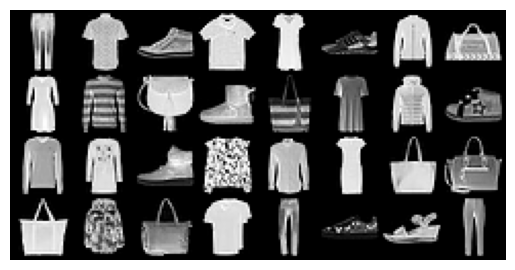

Ground Truth
Trouser    Shirt      Sneaker    top        Dress      Sneaker    Coat       Bag       
Dress      Pullover   Bag        Ankle boot Bag        Dress      Coat       Sneaker   
Pullover   Dress      Sneaker    Shirt      Shirt      Dress      Bag        Bag       
Bag        Coat       Bag        top        Trouser    Sneaker    Sandal     Trouser   

Predicted
Trouser    Shirt      Sneaker    top        Dress      Sneaker    Coat       Bag       
Dress      Pullover   Bag        Ankle boot Bag        Dress      Coat       Ankle boot
Pullover   Dress      Ankle boot Shirt      Shirt      Dress      Bag        Bag       
Bag        Coat       Bag        top        Trouser    Sneaker    Sandal     Trouser   


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [ ]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 87 %


Skomentuj wyniki:

Biorąc pod uwage zbiór danych osiągnięta dokładność jest ok, jest wystarczająca, ale można by było poszukać lekkiego ulepszenia

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

### Zadanie 3 (1 punkt)

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [ ]:
net.eval()

# Class for FashionMNIST
classes = ('Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)

        correct_predictions = (predicted == labels.to(device))

        for i in range(labels.size(0)):
            label = labels[i].item()
            class_correct[label] += correct_predictions[i].item()
            class_total[label] += 1

for i in range(10):
    classname = classes[i]
    accuracy = 100 * class_correct[i] / class_total[i]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: Top   is 77.7 %
Accuracy for class: Trouser is 96.7 %
Accuracy for class: Pullover is 77.4 %
Accuracy for class: Dress is 86.9 %
Accuracy for class: Coat  is 81.6 %
Accuracy for class: Sandal is 95.0 %
Accuracy for class: Shirt is 73.4 %
Accuracy for class: Sneaker is 93.0 %
Accuracy for class: Bag   is 95.6 %
Accuracy for class: Ankle boot is 97.1 %


Skomentuj wyniki:

Wszystkie predykcje uzsykały ponad 70% dokładności - jest to ok wynik, róznice między wynikami spowodowane sa podobienstem obiektow pewnych klas(dla obiektow z różnych klas, które są podobne predykcje częściej się mylą). Wyniki różnia się od seeda, ale zawsze minimalny wynik był conajmniej 2/3.

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka".

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [5]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [6]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [7]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [8]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 131MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów.

Do pobierania obrazów możemy się posłyżyć wget-em.

In [9]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2025-12-10 18:55:27--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224733 (219K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 219.47K   543KB/s    in 0.4s    

2025-12-10 18:55:27 (543 KB/s) - ‘toothbrushes.jpg’ saved [224733/224733]



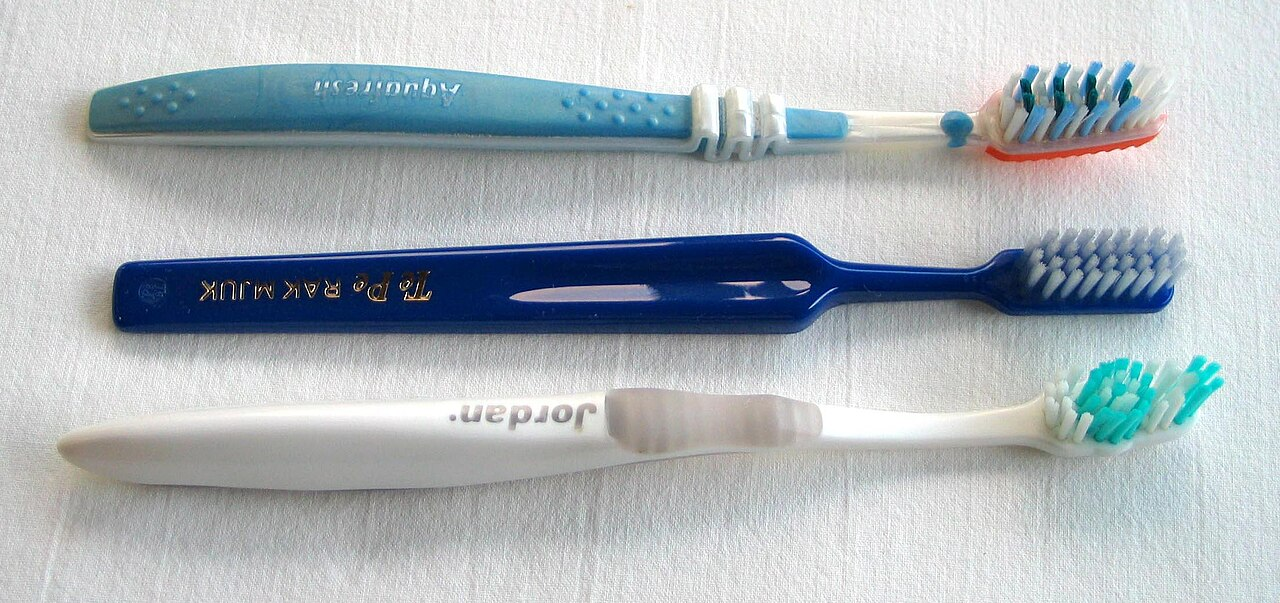

In [10]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [14]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

(torch.Size([3, 603, 1280]), torch.float32)

### Zadanie 4 (1 punkt)

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

toothbrush: 98.53%
toothbrush: 97.03%
toothbrush: 72.57%
toothbrush: 70.49%
book: 66.32%


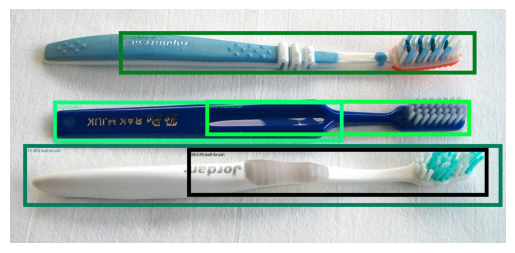

In [25]:
from torchvision.utils import draw_bounding_boxes

outputs = model([image_tensor.to(device)])
thr = 0.5

for out in outputs:
    m = out["scores"] > thr
    for b, s, l in zip(out["boxes"][m], out["scores"][m], out["labels"][m]):
        print(f"{classes[l.item()]}: {s.item()*100:.2f}%")

imgs = []
for o in outputs:
    imgs.append(
        draw_bounding_boxes(
            image_tensor_int, boxes=o["boxes"][o["scores"] > thr],
            labels=[
                f"{s.item()*100:.2f}% {classes[l.item()]}"
                for l, s in zip(
                    o["labels"][o["scores"] > thr],
                    o["scores"][o["scores"] > thr],
                )], width=10)
    )

for v in imgs:
    plt.imshow(v.permute(1, 2, 0))
    plt.axis("off")
    plt.show()


## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem.

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [26]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

--2025-12-10 19:07:44--  http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
Resolving d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)... 108.156.136.126
Connecting to d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)|108.156.136.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261292301 (249M) [application/zip]
Saving to: ‘hotdog.zip’

hotdog.zip          100%[===================>] 249.19M  31.3MB/s    in 8.9s    

2025-12-10 19:07:54 (28.1 MB/s) - ‘hotdog.zip’ saved [261292301/261292301]

Archive:  hotdog.zip
   creating: hotdog/
   creating: hotdog/train/
   creating: hotdog/train/not-hotdog/
 extracting: hotdog/train/not-hotdog/50.png  
 extracting: hotdog/train/not-hotdog/554.png  
 extracting: hotdog/train/not-hotdog/299.png  
  inflating: hotdog/train/not-hotdog/428.png  
  inflating: hotdog/train/not-hotdog/475.png  
  inflating: hotdog/train/not-hotdog/933.png  
 extracting: hotdog/train/not-h

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [27]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [28]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


In [29]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

### Zadanie 5 (1 punkt)

Zastąp wyjściową warstwę liniową naszej fine-fune'owanej sieci nową warstwą o odpowiedniej liczbie wyjść i zainicjuj ją losowymi wartościami.

In [34]:
from copy import deepcopy

finetuned_net = deepcopy(pretrained_net)
finetuned_net.fc = nn.Linear(512, 2)
[nn.init.uniform_(p) for p in finetuned_net.fc.parameters()]

[Parameter containing:
 tensor([[0.6790, 0.5743, 0.8430,  ..., 0.2075, 0.0986, 0.0268],
         [0.9187, 0.8008, 0.5285,  ..., 0.3181, 0.6768, 0.3297]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0160, 0.5954], requires_grad=True)]

In [35]:
assert finetuned_net.fc.out_features == 2
print("Solution is correct!")

Solution is correct!


Poniżej znajduje się pętla ucząca, która dotrenuje nasz detektor hot-dog-ów.

In [32]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

Fine-tuning...

In [37]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

### Zadanie 6 (1 punkt)

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [38]:
def train_fine_tuning(net, learning_rate, num_epochs=15):

    trainer = torch.optim.SGD([
            {"params": [p for n,p in net.named_parameters() if n not in ["fc.weight","fc.bias"]], "lr": learning_rate},
            {"params": [p for n,p in net.named_parameters() if n in ["fc.weight","fc.bias"]], "lr": learning_rate * 10},
        ])

    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist


# your_code


In [39]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 1.9200 Acc: 0.5865
val Loss: 1.6208 Acc: 0.6562

Epoch 2/15
----------
train Loss: 1.1971 Acc: 0.6950
val Loss: 1.2616 Acc: 0.7237

Epoch 3/15
----------
train Loss: 1.0431 Acc: 0.7365
val Loss: 1.1132 Acc: 0.7562

Epoch 4/15
----------
train Loss: 0.8453 Acc: 0.7795
val Loss: 0.9926 Acc: 0.7812

Epoch 5/15
----------
train Loss: 0.7977 Acc: 0.7905
val Loss: 0.8918 Acc: 0.8062

Epoch 6/15
----------
train Loss: 0.7518 Acc: 0.8080
val Loss: 0.8405 Acc: 0.8012

Epoch 7/15
----------
train Loss: 0.7363 Acc: 0.8185
val Loss: 0.8000 Acc: 0.8162

Epoch 8/15
----------
train Loss: 0.7241 Acc: 0.8110
val Loss: 0.7308 Acc: 0.8287

Epoch 9/15
----------
train Loss: 0.6831 Acc: 0.8260
val Loss: 0.6919 Acc: 0.8312

Epoch 10/15
----------
train Loss: 0.5746 Acc: 0.8435
val Loss: 0.6689 Acc: 0.8413

Epoch 11/15
----------
train Loss: 0.5835 Acc: 0.8445
val Loss: 0.6141 Acc: 0.8487

Epoch 12/15
----------
train Loss: 0.5907 Acc: 0.8475
val Loss: 0.6186 Acc: 0.8550

E

skomentuj wyniki:

Jak na tak krótki okres czasu to otrzymany wynik jest ok

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [40]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)

    plt.pause(0.001)

In [41]:
import matplotlib.pyplot as plt
plt.ion()


def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return



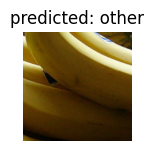

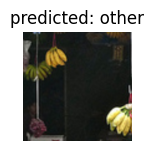

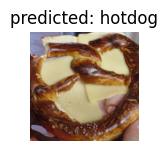

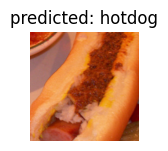

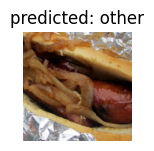

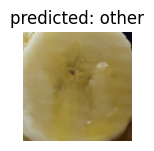

In [42]:
visualize_model(model_ft)

## Zadanie dodatkowe (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, przykładowo [klasyfikację gatunków ptaków](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [analizę zdjęć rentgenowskich płuc](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). Zastosuj finetuning współczesnej, pretrenowanej sieci neuronowej, np. ResNet34 (lub głębszej), ConvNeXt, MobileNetV3.

In [ ]:
import os
import tarfile
import urllib.request

os.makedirs('data', exist_ok=True)

url = 'https://data.caltech.edu/records/65de6-vp158/files/CUB_200_2011.tgz'
filename = 'data/CUB_200_2011.tgz'

urllib.request.urlretrieve(url, filename)

with tarfile.open(filename, 'r:gz') as tar:tar.extractall('data/')

In [11]:
model = torchvision.models.resnet34(weights=torchvision.models.ResNet34_Weights.IMAGENET1K_V1)
for param in model.parameters(): param.requires_grad = False
num_classes = 200
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
for param in model.fc.parameters(): param.requires_grad = True

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 207MB/s]


In [5]:
from torch.utils.data import Dataset
import pandas as pd


class Cub2011(Dataset):
    base_folder = "CUB_200_2011/images"

    def __init__(self, root, isTrain=True, transform=None):
        self.root = root
        self.transform = transform
        self.isTrain = isTrain

        self._load_metadata()

    def _load_metadata(self):
        images = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "images.txt"),
            sep=" ",
            names=["img_id", "filepath"],
        )
        image_class_labels = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "image_class_labels.txt"),
            sep=" ",
            names=["img_id", "target"],
        )
        train_test_split = pd.read_csv(
            os.path.join(self.root, "CUB_200_2011", "train_test_split.txt"),
            sep=" ",
            names=["img_id", "is_training_img"],
        )

        data = images.merge(image_class_labels, on="img_id")
        self.data = data.merge(train_test_split, on="img_id")

        if self.isTrain:
            self.data = self.data[self.data.is_training_img == 1]
        else:
            self.data = self.data[self.data.is_training_img == 0]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        path = os.path.join(self.root, self.base_folder, sample.filepath)
        target = sample.target - 1
        img = Image.open(path).convert("RGB")
        img = self.transform(img)

        return img, target

In [6]:
import os
root = os.path.join(os.getcwd(), "data")

classes = pd.read_csv(
    os.path.join(root, "CUB_200_2011", "classes.txt"),
    sep=" ",
    names=["class_id", "name"],
)

classes["name"] = classes["name"].str[4:]
classes["name"] = classes["name"].str.replace("_", " ")

class_names = list(classes["name"])

print(f"Class count: {len(classes)}\n")

print(f"Sample class names: ")
print(classes.head())

Class count: 200

Sample class names: 
   class_id                    name
0         1  Black footed Albatross
1         2        Laysan Albatross
2         3         Sooty Albatross
3         4       Groove billed Ani
4         5          Crested Auklet


In [9]:
import torch
import torchvision
from torchvision import transforms
from torchvision.transforms import v2

torch.manual_seed(17)

transformer = torchvision.models.ResNet34_Weights.IMAGENET1K_V1.transforms()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose(
    [
        v2.Resize(256),
        v2.RandomResizedCrop(224),
        v2.RandomApply(
            [
                v2.RandomRotation((-30, 30)),
                v2.RandomHorizontalFlip(),
            ]
        ),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        v2.Resize(256),
        v2.CenterCrop(224),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        normalize,
    ]
)

In [18]:
from torch.utils.data import DataLoader, Subset
import numpy as np
from PIL import Image

train_dataset = Cub2011(root=root, isTrain=True, transform=train_augs)
test_dataset_full = Cub2011(root=root, isTrain=False, transform=test_augs)

test_size = len(test_dataset_full)
indices = list(range(test_size))
np.random.seed(42)
np.random.shuffle(indices)

split = test_size // 2
valid_indices = indices[:split]
test_indices = indices[split:]

valid_dataset = Subset(test_dataset_full, valid_indices)
test_dataset = Subset(test_dataset_full, test_indices)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Valid dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

batch_size = 48
train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_iter = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_iter = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

images, labels = next(iter(train_iter))
print(f"Sample batch size: {images.size()}")

Train dataset size: 5994
Valid dataset size: 2897
Test dataset size: 2897
Sample batch size: torch.Size([48, 3, 224, 224])


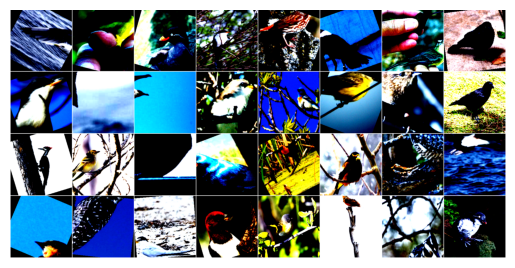

Red legged Kittiwake           Mourning Warbler               Crested Auklet                 Yellow billed Cuckoo           Fox Sparrow                    White necked Raven             Philadelphia Vireo             Brewer Blackbird              
Mangrove Cuckoo                Black footed Albatross         Pomarine Jaeger                Yellow billed Cuckoo           Lazuli Bunting                 Tropical Kingbird              Winter Wren                    American Crow                 
Pileated Woodpecker            White eyed Vireo               Red winged Blackbird           Cape Glossy Starling           Yellow headed Blackbird        Evening Grosbeak               Nighthawk                      Laysan Albatross              
Barn Swallow                   Red cockaded Woodpecker        Least Tern                     Red headed Woodpecker          American Redstart              Western Meadowlark             Pied Kingfisher                Least Auklet                  


In [24]:
def plot_sample(images, labels, classes, nrow=8):

    imshow(
        torchvision.utils.make_grid(images, nrow=nrow, scale_each=True, pad_value=10)
    )

    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(
            " ".join(
                f"{classes[c]:{len(max(classes, key=lambda x: len(x)))}s}" for c in r
            )
        )
images, labels = next(iter(train_iter))

plot_sample(images=images[:32], labels=labels[:32], classes=class_names)

In [25]:
pretrained_resnet = torchvision.models.resnet34(
    weights=torchvision.models.ResNet34_Weights.IMAGENET1K_V1
)

In [29]:
from copy import deepcopy

finetuned_resnet = deepcopy(pretrained_resnet)

finetuned_resnet.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=256, out_features=200, bias=True),
)

model_ft = finetuned_resnet.to(device)

In [34]:
def train_resnet_with_fine_tuning(
    net,
    learning_rate,
    train_iter,
    valid_iter,
    num_epochs=100,
    print_interval=1,
    patience=None,
):
    normal_params = []
    last_layer_params = []

    for name, param in net.named_parameters():
        if "fc" in name: last_layer_params.append(param)
        else:normal_params.append(param)

    trainer = torch.optim.AdamW(
        [
            {"params": normal_params, "lr": learning_rate},
            {"params": last_layer_params, "lr": learning_rate * 10},
        ]
    )

    dataloaders_dict = {"train": train_iter, "val": valid_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net,
        dataloaders_dict,
        criterion,
        trainer,
        num_epochs=num_epochs
    )
    return model_ft, hist

In [36]:
trained_model_ft, hist = train_resnet_with_fine_tuning(
    model_ft,
    learning_rate=5e-5,
    train_iter=train_iter,
    valid_iter=valid_iter,
    num_epochs=15,
    patience=3,
)

Epoch 1/15
----------
train Loss: 4.3077 Acc: 0.0772
val Loss: 3.0573 Acc: 0.2855

Epoch 2/15
----------
train Loss: 3.3827 Acc: 0.1822
val Loss: 2.2231 Acc: 0.4356

Epoch 3/15
----------
train Loss: 2.8436 Acc: 0.2733
val Loss: 1.7379 Acc: 0.5302

Epoch 4/15
----------
train Loss: 2.4704 Acc: 0.3510
val Loss: 1.5012 Acc: 0.5720

Epoch 5/15
----------
train Loss: 2.2560 Acc: 0.3994
val Loss: 1.3321 Acc: 0.6141

Epoch 6/15
----------
train Loss: 2.0265 Acc: 0.4551
val Loss: 1.2077 Acc: 0.6614

Epoch 7/15
----------
train Loss: 1.8851 Acc: 0.4878
val Loss: 1.0988 Acc: 0.6893

Epoch 8/15
----------
train Loss: 1.7439 Acc: 0.5299
val Loss: 1.0484 Acc: 0.6942

Epoch 9/15
----------
train Loss: 1.6490 Acc: 0.5537
val Loss: 1.0815 Acc: 0.6942

Epoch 10/15
----------
train Loss: 1.6000 Acc: 0.5669
val Loss: 0.9936 Acc: 0.7132

Epoch 11/15
----------
train Loss: 1.5264 Acc: 0.5903
val Loss: 0.9642 Acc: 0.7235

Epoch 12/15
----------
train Loss: 1.4485 Acc: 0.6069
val Loss: 0.9639 Acc: 0.7270

E

In [41]:
correct, total, all_predictions, all_labels = get_all_acc(
    trained_model_ft, test_iter, 200
)

In [44]:
acc = get_total_acc(trained_model_ft, test_iter)

print(f"Accuracy of the network for the test set: {acc} %")

Accuracy of the network for the test set: 73 %
